# Business Problem:

A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

**Goal & Objective:** The objective of this exercise is to build a model, using historical data that will
determine an optimum weight of the product to be shipped each time to the warehouse.

Also try to analysis the demand pattern in different pockets of the country so management can drive
the advertisement campaign particular in those pockets.

This is the first phase of the agreement; hence, company has shared very limited information. Once
you are able to showcase a tangible impact with this much of information then company will open the
360 degree data lake for your consulting company to build a more robust model.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python Project/Supply-Chain/Data.csv')

**Data Exploration**

In [ ]:
df.head().T

,0,1,2,3,4
Ware_house_ID,WH_100000,WH_100001,WH_100002,WH_100003,WH_100004
WH_Manager_ID,EID_50000,EID_50001,EID_50002,EID_50003,EID_50004
Location_type,Urban,Rural,Rural,Rural,Rural
WH_capacity_size,Small,Large,Mid,Mid,Large
zone,West,North,South,North,North
WH_regional_zone,Zone 6,Zone 5,Zone 2,Zone 3,Zone 5
num_refill_req_l3m,3,0,1,7,3
transport_issue_l1y,1,0,0,4,1
Competitor_in_mkt,2,4,4,2,2
retail_shop_num,4651,6217,4306,6000,4740


In [ ]:
df.tail().T

,24995,24996,24997,24998,24999
Ware_house_ID,WH_124995,WH_124996,WH_124997,WH_124998,WH_124999
WH_Manager_ID,EID_74995,EID_74996,EID_74997,EID_74998,EID_74999
Location_type,Rural,Rural,Urban,Rural,Rural
WH_capacity_size,Small,Mid,Large,Small,Mid
zone,North,West,South,North,West
WH_regional_zone,Zone 1,Zone 2,Zone 5,Zone 1,Zone 4
num_refill_req_l3m,3,6,7,1,8
transport_issue_l1y,0,0,0,0,2
Competitor_in_mkt,4,4,2,2,4
retail_shop_num,5390,4490,5403,10562,5664


In [ ]:
print('The no. of rows in the observations',df.shape[0],'\n''The no. of columns in the observations',df.shape[1])

The no. of rows in the observations 25000 
The no. of columns in the observations 24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
df.dtypes.value_counts()

,count
int64,14
object,8
float64,2


In [ ]:
df.nunique()

,0
Ware_house_ID,25000
WH_Manager_ID,25000
Location_type,2
WH_capacity_size,3
zone,4
WH_regional_zone,6
num_refill_req_l3m,9
transport_issue_l1y,6
Competitor_in_mkt,12
retail_shop_num,4906


In [ ]:
df.isnull().sum()

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [ ]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ware_house_ID,25000,25000,WH_124999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_Manager_ID,25000,25000,EID_74999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_type,25000,2,Rural,22957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_capacity_size,25000,3,Large,10169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,25000,4,North,10278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WH_regional_zone,25000,6,Zone 6,8339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_refill_req_l3m,25000.0,NaN,NaN,NaN,4.09,2.61,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,NaN,NaN,NaN,0.77,1.2,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,NaN,NaN,NaN,3.1,1.14,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,NaN,NaN,NaN,4985.71,1052.83,1821.0,4313.0,4859.0,5500.0,11008.0


In [ ]:
# Convert from kg to tons
df['product_wg_ton'] = df['product_wg_ton'] / 1000

In [ ]:
#Lets examine the target column which is Product Weight in tons
df.describe()['product_wg_ton'].round(3)

,product_wg_ton
count,25000.000
mean,22.103
std,11.608
min,2.065
25%,13.059
50%,22.101
75%,30.103
max,55.151


In [ ]:
df.duplicated().sum()

np.int64(0)

**Data Cleaning**

In [ ]:
df_null = df.isnull().sum()
df_null[df_null.values > 0].sort_values(ascending=False)

,0
wh_est_year,11881
workers_num,990
approved_wh_govt_certificate,908


In [ ]:
df.nunique().sort_values(ascending=False)

,0
Ware_house_ID,25000
WH_Manager_ID,25000
retail_shop_num,4906
product_wg_ton,4561
dist_from_hub,217
workers_num,60
distributor_num,56
storage_issue_reported_l3m,37
govt_check_l3m,32
wh_est_year,28


In [ ]:
df.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace=True)

In [ ]:
print(len(df.columns))

22


In [ ]:
df.isna().sum()

,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0
wh_owner_type,0
distributor_num,0


In [ ]:
#Checking the percentage of null values
print('Feature Name |','No. of null values |', 'Percentage of null values','\n')
for f in ['workers_num','wh_est_year','approved_wh_govt_certificate']:
  print(f,'|',df[f].isna().sum(),'|',round((df[f].isna().sum()/len(df))*100,2),'%')

Feature Name | No. of null values | Percentage of null values 

workers_num | 990 | 3.96 %
wh_est_year | 11881 | 47.52 %
approved_wh_govt_certificate | 908 | 3.63 %


**Treating Null Values**

In [ ]:
df.drop(columns=['wh_est_year'], inplace=True)

In [ ]:
df['workers_num'].fillna(df['workers_num'].median(),inplace=True)

In [ ]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [ ]:
df.isnull().sum()


,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0
wh_owner_type,0
distributor_num,0


### **Analyzing the Target Variable**

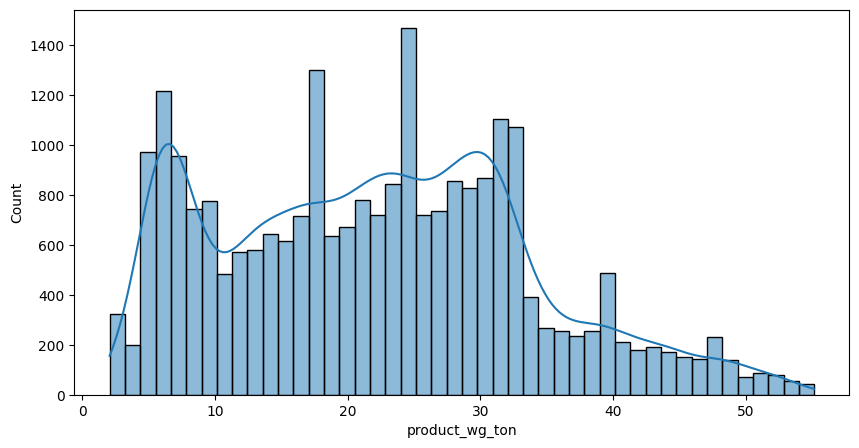

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['product_wg_ton'], kde=True)
plt.show()

<Axes: ylabel='product_wg_ton'>

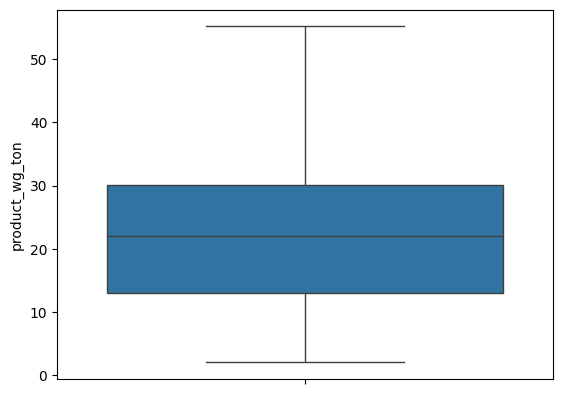

In [ ]:
sns.boxplot(df['product_wg_ton'])


### **Univariate Analysis**

**For Numerical Values**

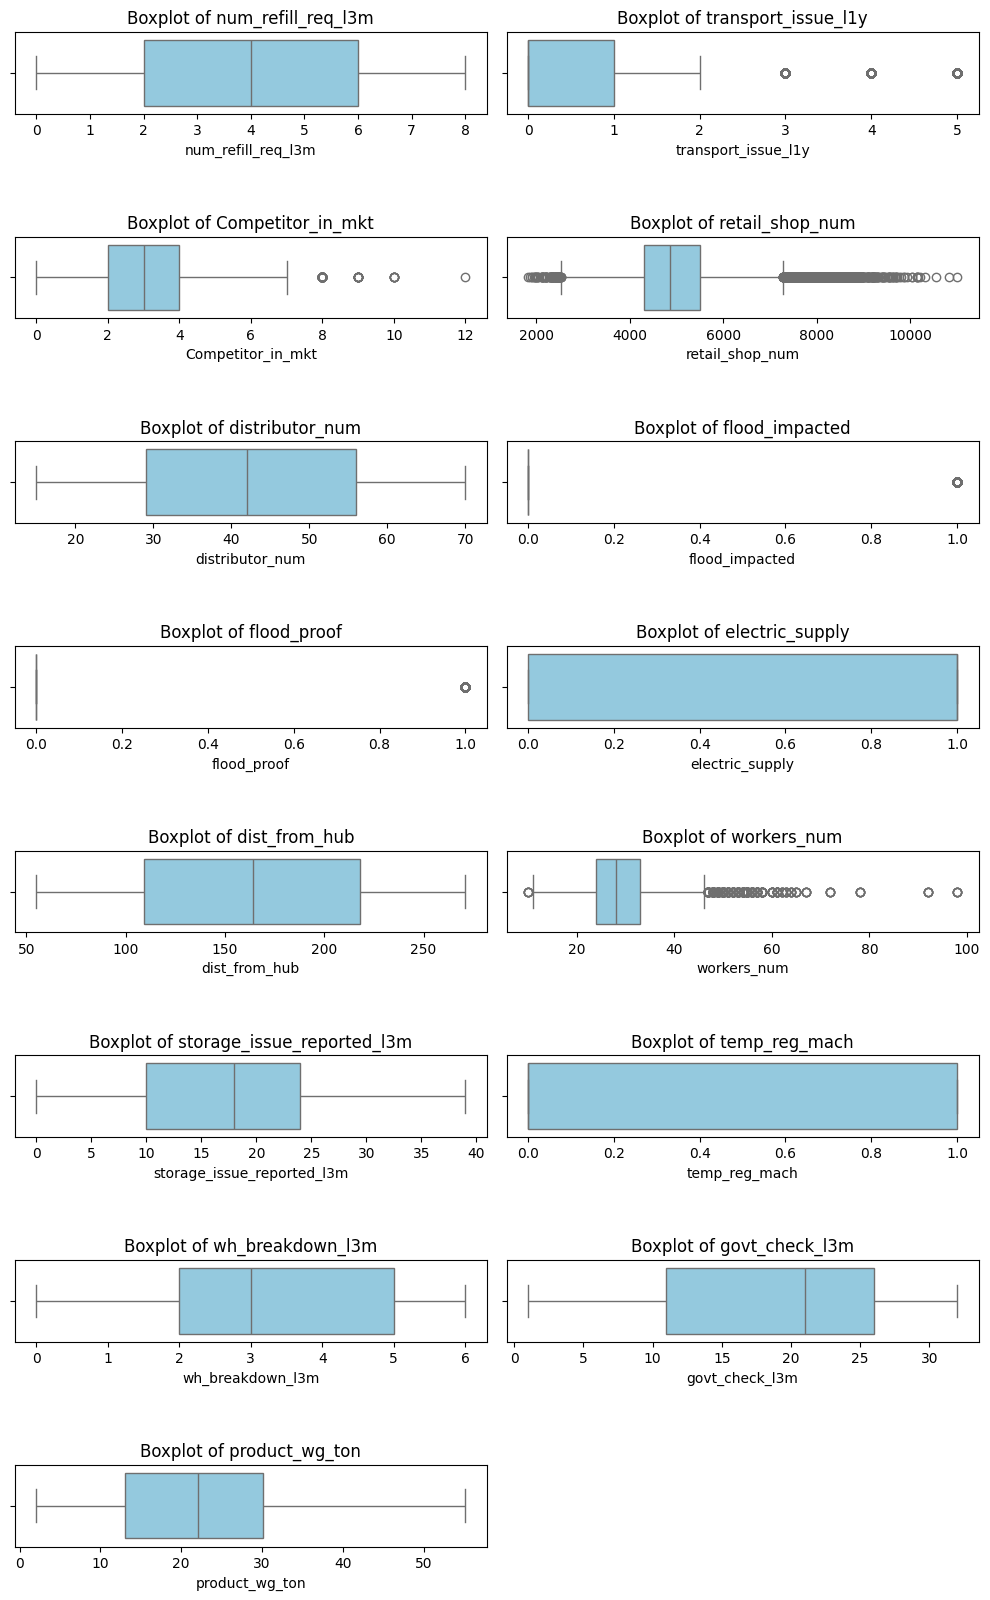

In [ ]:
#Boxplotting all numerical cols.

#Selecting numerical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
#Plot each as a subplot
plt.figure(figsize=(10,len(num_cols)*2))
for i, col in enumerate(num_cols,1):
  plt.subplot(len(num_cols),2,i)
  sns.boxplot(data=df,x=col,color='skyblue')
  plt.title(f'Boxplot of {col}')
  plt.tight_layout()
  plt.subplots_adjust(hspace=1.5)
plt.show()

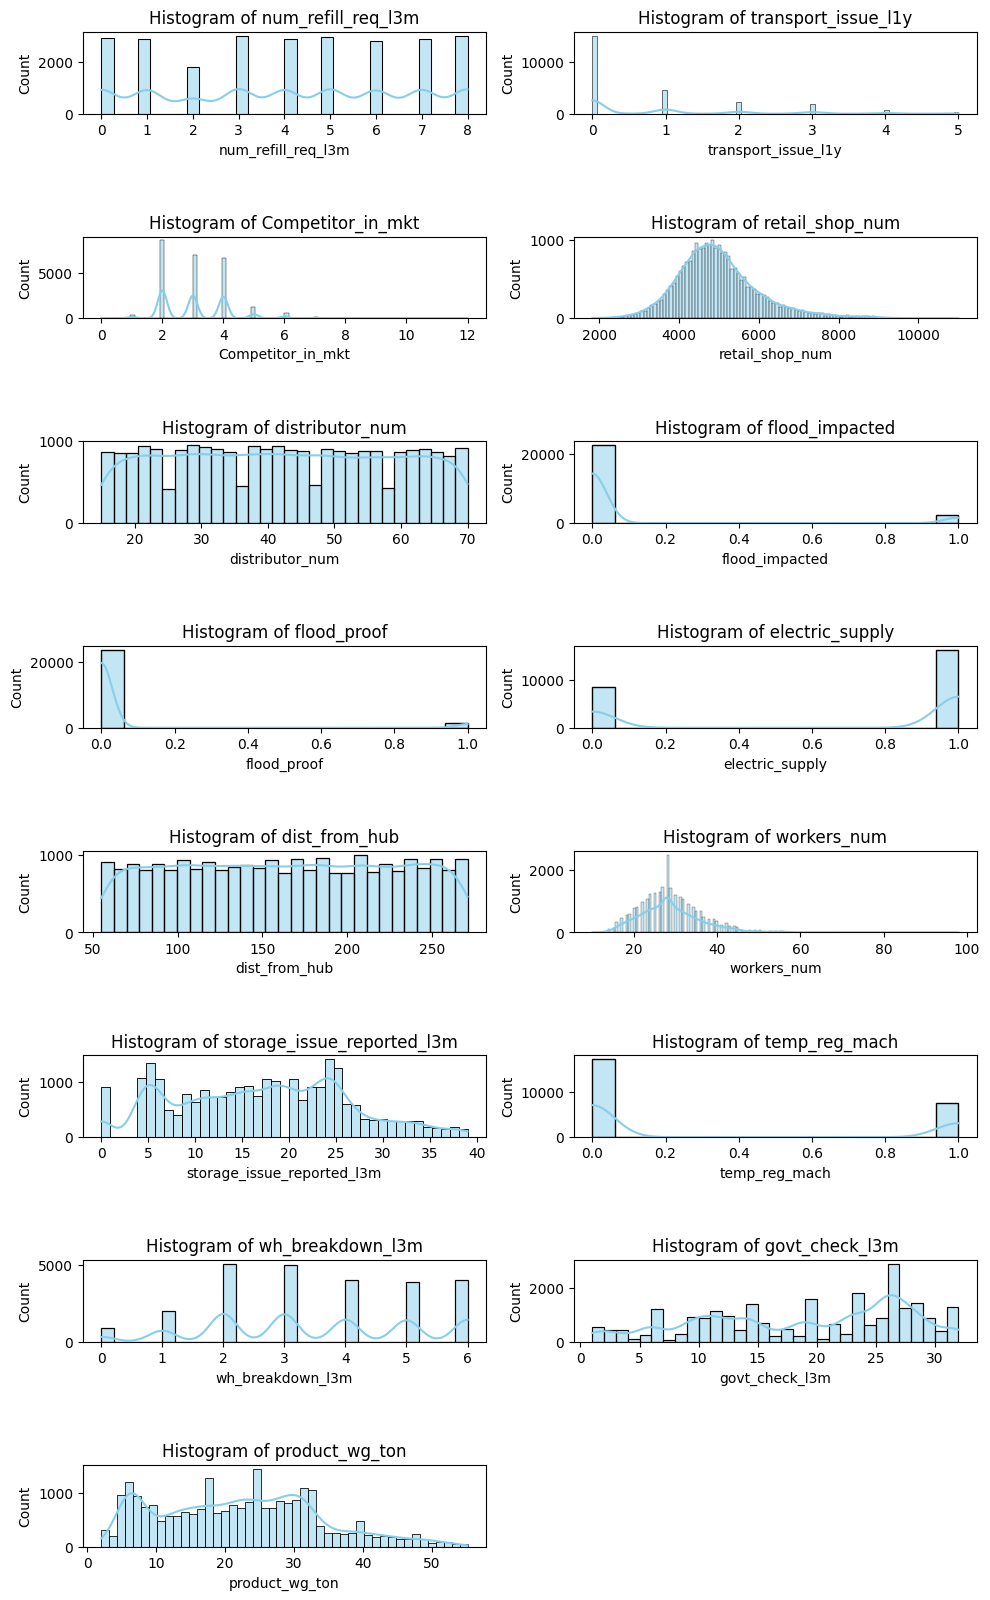

In [ ]:
#Histogram for all numerical cols

plt.figure(figsize=(10,len(num_cols)*2))
for i, col in enumerate(num_cols,1):
  plt.subplot(len(num_cols),2,i)
  sns.histplot(data=df,x=col,kde=True,color='skyblue')
  plt.title(f'Histogram of {col}')
  plt.tight_layout()
  plt.subplots_adjust(hspace=1.5)
plt.show()

**For Categorical Values**

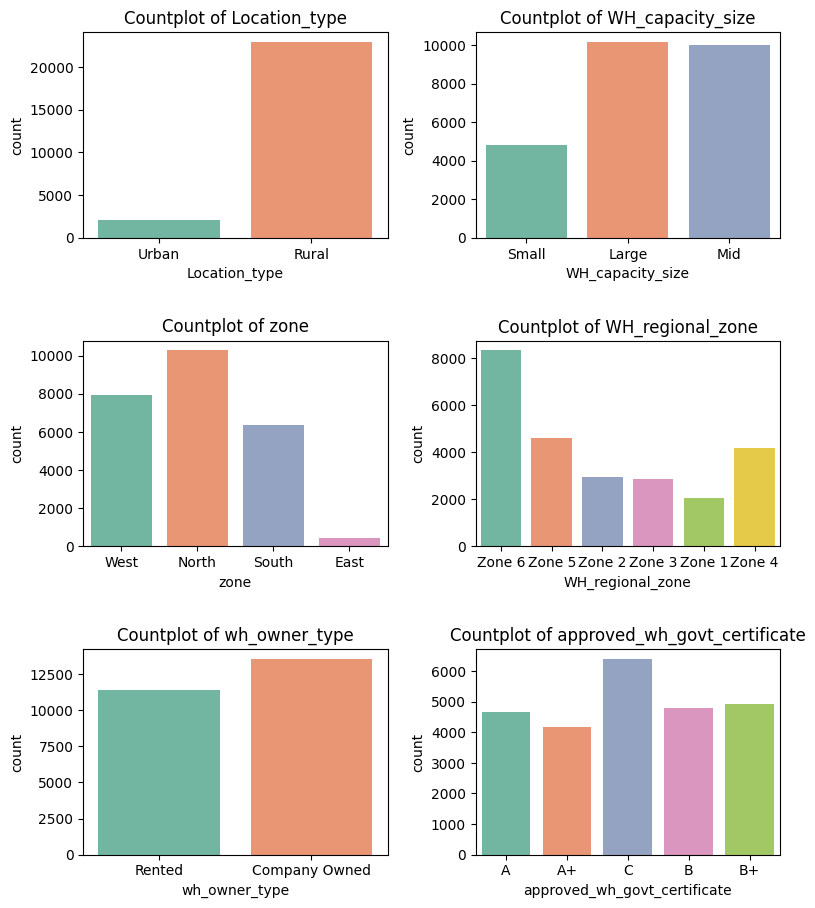

In [ ]:
#Analyzing all categorical variable
cat_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(8,len(cat_cols)*3))
for i,col in enumerate(cat_cols,1):
  plt.subplot(len(cat_cols),2,i)
  sns.countplot(data=df,x=col,palette='Set2')
  plt.title(f'Countplot of {col}')
  plt.tight_layout()
  plt.subplots_adjust(hspace=0.5)
plt.show()

### Bivariate Analysis

#### Categorical VS Target Variable

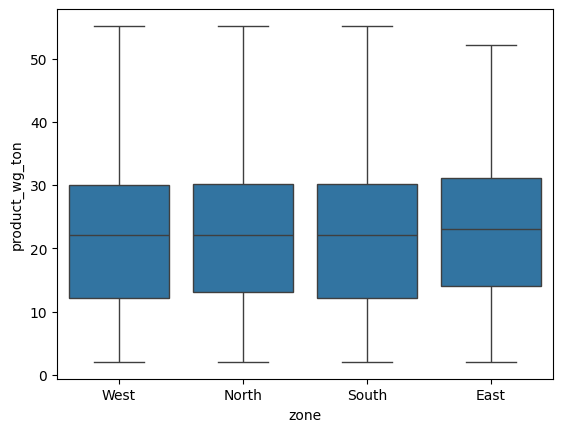

In [ ]:
# Zone with Target Variable
sns.boxplot(data=df, x='zone', y='product_wg_ton')
plt.show()

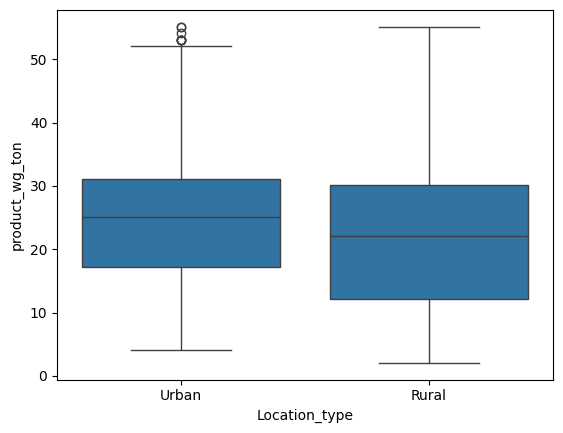

In [ ]:
# Location Type VS Target Variable
sns.boxplot(data=df, x='Location_type', y='product_wg_ton')
plt.show()

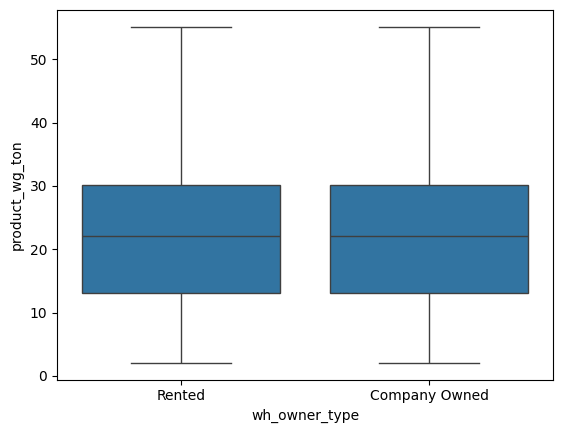

In [ ]:
# Warehouse Owner Type VS Target Variable
sns.boxplot(data=df, x='wh_owner_type', y='product_wg_ton')
plt.show()


### Numerical VS Target Variable

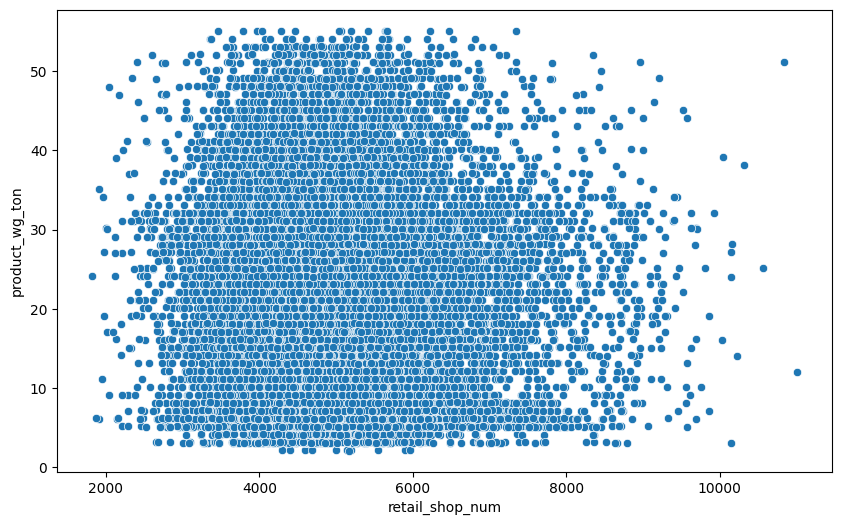

In [ ]:
# Number of Retail shops VS Target Variable
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='retail_shop_num', y='product_wg_ton')
plt.show()

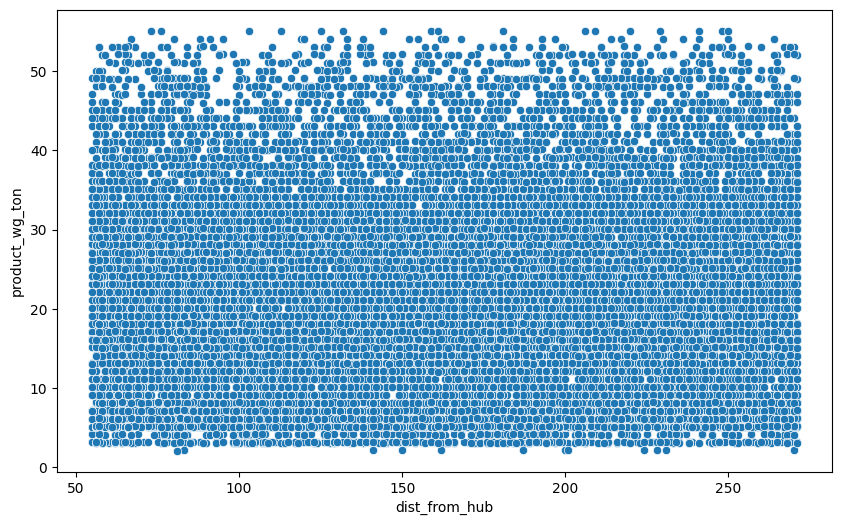

In [ ]:
# Distance between Hub VS Target Variable
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='dist_from_hub',y='product_wg_ton')
plt.show()

### Correlation for all Numerical Columns

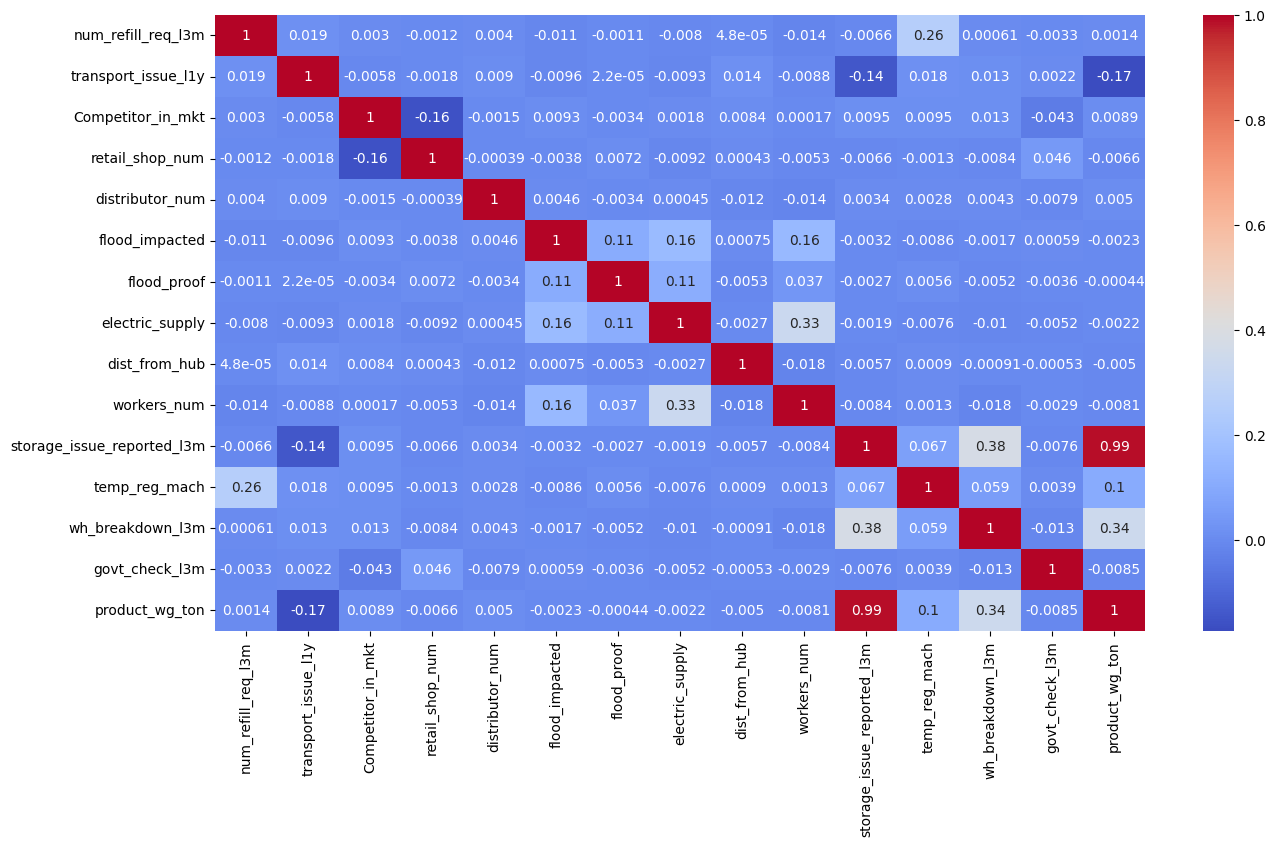

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [ ]:
numeric_data = df.select_dtypes(include=['number'])
correlations = numeric_data.drop(columns='product_wg_ton').corrwith(df['product_wg_ton']).round(3).sort_values()
correlations

,0
transport_issue_l1y,-0.174
workers_num,-0.008
govt_check_l3m,-0.008
retail_shop_num,-0.007
dist_from_hub,-0.005
electric_supply,-0.002
flood_impacted,-0.002
flood_proof,-0.000
num_refill_req_l3m,0.001
distributor_num,0.005


<Axes: xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

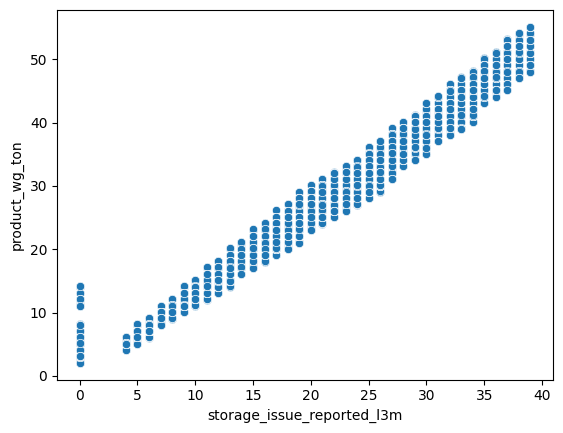

In [ ]:
sns.scatterplot(x='storage_issue_reported_l3m', y='product_wg_ton', data=df)


### Outlier Treatment

In [ ]:
def outlier_treatment(col,df):
  Q1 = np.nanpercentile(df[col],25)
  Q3 = np.nanpercentile(df[col],75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
  df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
  return df

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64'])
for col in num_cols.columns:
  df = outlier_treatment(col,df)

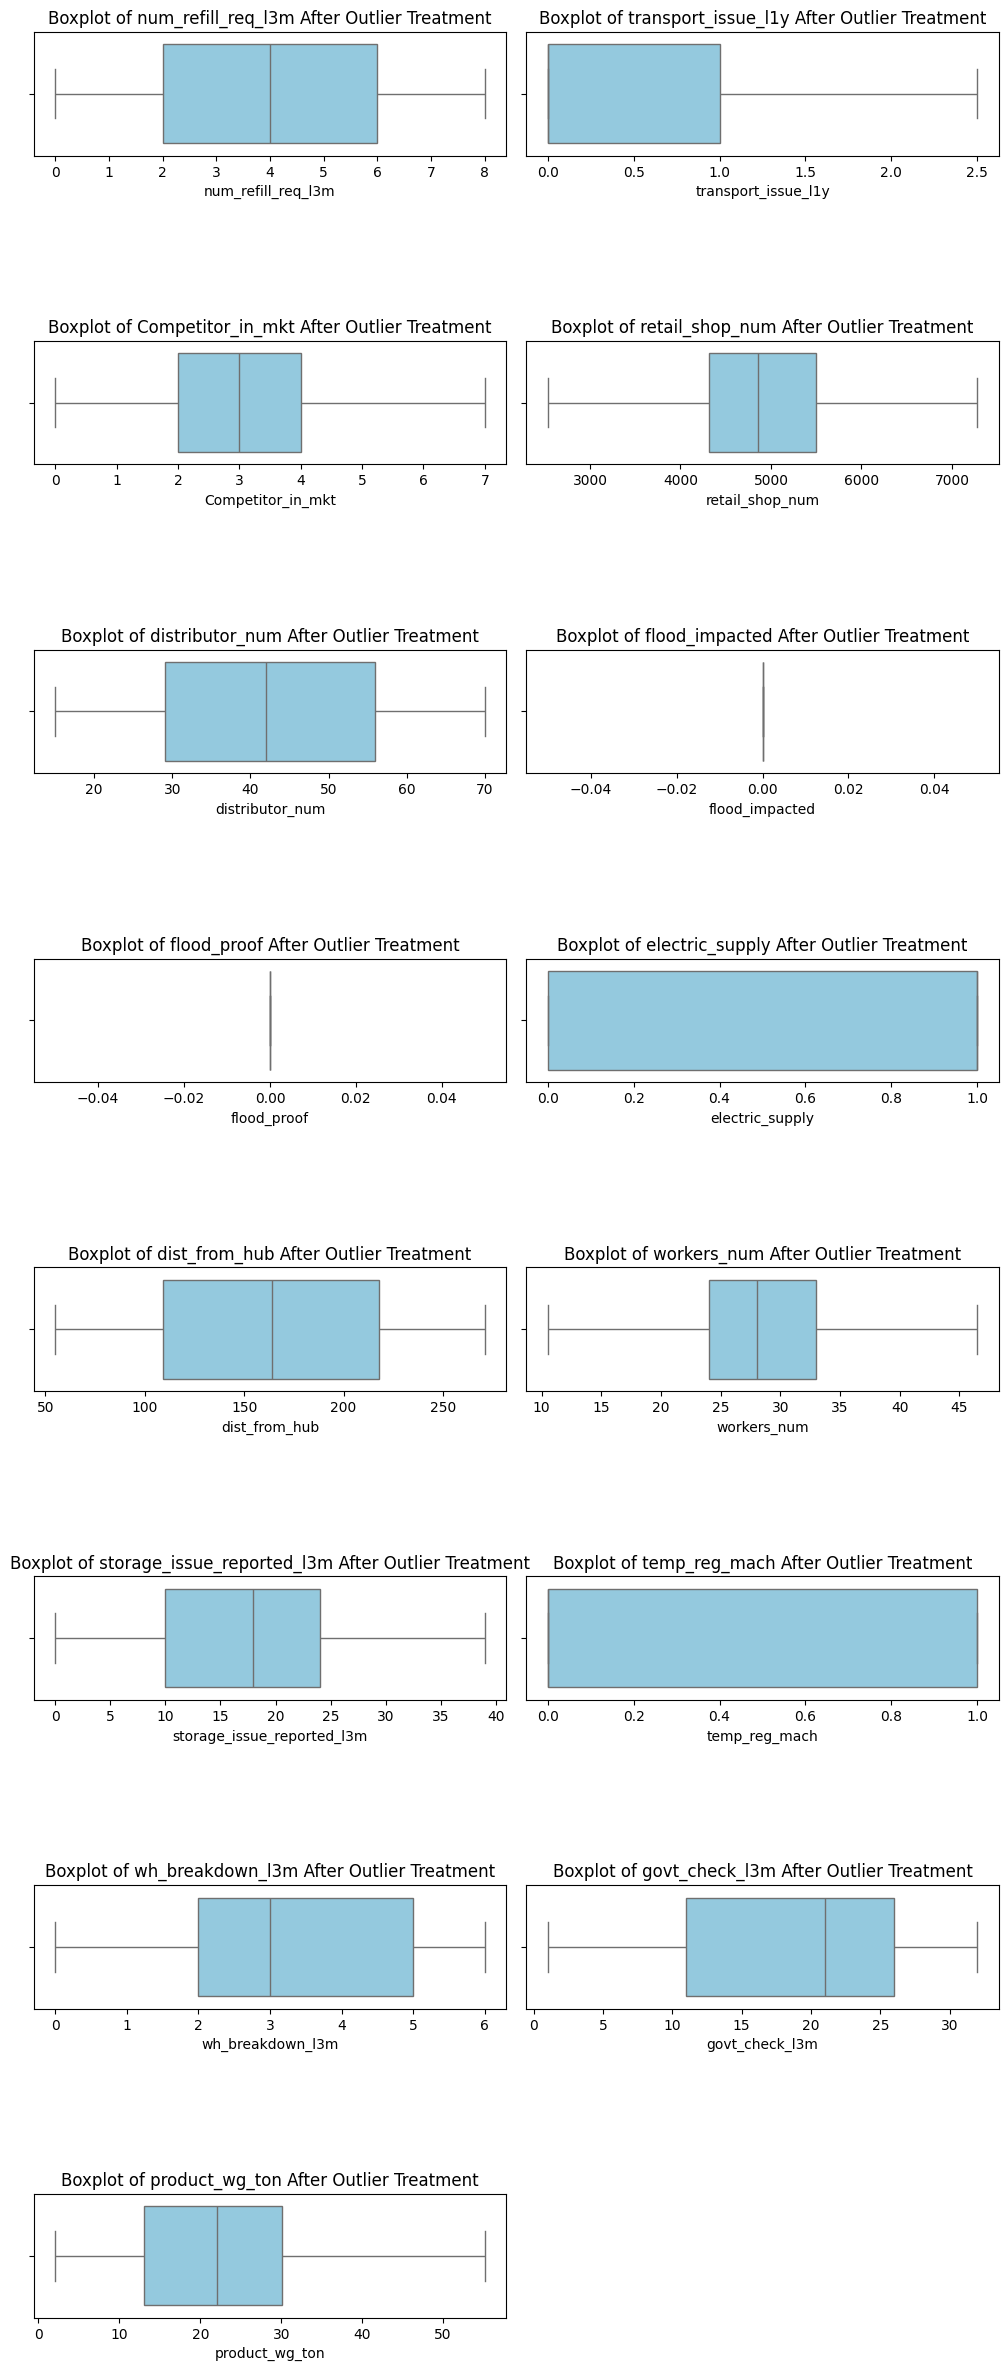

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, len(num_cols)*3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col} After Outlier Treatment')
    plt.tight_layout()
    plt.subplots_adjust(hspace=1.5)
plt.show()

In [ ]:
#Removing flood_impacted and flood_proof as they were found to be irrelevant to the model's objective.
df.drop(columns=['flood_impacted','flood_proof'],inplace=True)

In [ ]:
df.dtypes

,0
Location_type,object
WH_capacity_size,object
zone,object
WH_regional_zone,object
num_refill_req_l3m,float64
transport_issue_l1y,float64
Competitor_in_mkt,float64
retail_shop_num,float64
wh_owner_type,object
distributor_num,float64


In [ ]:
def check_value_count_for_categorical_data(column):
  print(f"Value counts for '{column}':\n{df[column].value_counts().to_string()}\n{'-'*40}\n")

In [ ]:
for col in cat_cols:
    check_value_count_for_categorical_data(col)

Value counts for 'Location_type':
Location_type
Rural    22957
Urban     2043
----------------------------------------

Value counts for 'WH_capacity_size':
WH_capacity_size
Large    10169
Mid      10020
Small     4811
----------------------------------------

Value counts for 'zone':
zone
North    10278
West      7931
South     6362
East       429
----------------------------------------

Value counts for 'WH_regional_zone':
WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
----------------------------------------

Value counts for 'wh_owner_type':
wh_owner_type
Company Owned    13578
Rented           11422
----------------------------------------

Value counts for 'approved_wh_govt_certificate':
approved_wh_govt_certificate
C     6409
B+    4917
B     4812
A     4671
A+    4191
----------------------------------------



## Model building and interpretation

**One Hot Encoding**

In [ ]:
categorical_columns = [
    'zone',
    'Location_type',
    'wh_owner_type',
    'WH_regional_zone'
]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

**Label Encoding**

In [ ]:
from sklearn import preprocessing
def label_encoding(df, column):
  label_encoder = preprocessing.LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  return label_encoder

In [ ]:
for col in ['WH_capacity_size','approved_wh_govt_certificate']:
  label_encoder = label_encoding(df_encoded,col)

In [ ]:
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})


In [ ]:
def check_data(df):
    print("Shape:", df.shape)
    print("\nData Types:\n", df.dtypes)
    print("\nSample Data:\n", df.head())
    print("\nMissing Values:\n", df.isnull().sum())


In [ ]:
check_data(df_encoded)


Shape: (25000, 25)

Data Types:
 WH_capacity_size                  int64
num_refill_req_l3m              float64
transport_issue_l1y             float64
Competitor_in_mkt               float64
retail_shop_num                 float64
distributor_num                 float64
electric_supply                 float64
dist_from_hub                   float64
workers_num                     float64
storage_issue_reported_l3m      float64
temp_reg_mach                   float64
approved_wh_govt_certificate      int64
wh_breakdown_l3m                float64
govt_check_l3m                  float64
product_wg_ton                  float64
zone_North                        int64
zone_South                        int64
zone_West                         int64
Location_type_Urban               int64
wh_owner_type_Rented              int64
WH_regional_zone_Zone 2           int64
WH_regional_zone_Zone 3           int64
WH_regional_zone_Zone 4           int64
WH_regional_zone_Zone 5           int64
WH_regi

### Train Test Split

**Removing target col from the feature dataframe**

In [ ]:
x = df_encoded.drop('product_wg_ton', axis = 1)
y = df_encoded['product_wg_ton']

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)
print('Shape of X_train',X_train.shape)
print('Shape of X_test', X_test.shape)

Shape of X_train (20000, 24)
Shape of X_test (5000, 24)


**Feartured Scaling (Standardization)**

In [ ]:
non_cat_col = [
    'num_refill_req_l3m',
    'transport_issue_l1y',
    'Competitor_in_mkt',
    'retail_shop_num',
    'distributor_num',
    'electric_supply',
    'dist_from_hub',
    'workers_num',
    'storage_issue_reported_l3m',
    'temp_reg_mach',
    'wh_breakdown_l3m',
    'govt_check_l3m',

]
X_train,X_test,y_train,y_test

scaler = StandardScaler()
X_train[non_cat_col] = scaler.fit_transform(X_train[non_cat_col])
X_test[non_cat_col] = scaler.transform(X_test[non_cat_col])

In [ ]:
X_train.head()

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,...,zone_North,zone_South,zone_West,Location_type_Urban,wh_owner_type_Rented,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
23311,0,-1.188838,0.372996,0.815374,-0.908895,1.033787,0.719661,1.193945,-0.949013,1.184447,...,0,0,1,0,0,0,0,0,0,1
23623,1,1.496848,-0.715249,-0.083555,1.155974,0.659390,0.719661,0.954705,0.171874,2.165712,...,1,0,0,0,1,0,1,0,0,0
1020,0,1.496848,-0.715249,0.815374,-0.891326,0.284994,0.719661,-0.018206,-0.388570,0.748329,...,1,0,0,0,0,0,0,0,0,1
12645,0,1.496848,0.372996,-0.982485,-0.517210,0.596991,0.719661,-0.624282,1.572983,0.966388,...,0,1,0,0,0,0,0,0,1,0
1533,0,-0.037830,-0.715249,0.815374,-0.145162,0.596991,-1.389544,-0.177700,-1.509457,0.203182,...,1,0,0,0,1,0,0,0,0,1


###Training a Regression Model

#### Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Making Predictions
y_pred = model.predict(X_test)

In [ ]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Squred Error (MSE): {mse: .2f}")
print('--'*20)
print(f"Mean Absolute Error (MAE): {mae: .2f}")
print('--'*20)
print(f"R-squared (R2): {r2: .2f}")
print('--'*20)
print(f"Mean Absolute Percentage Error (MAPE): {mape: .2f}%")

Mean Squred Error (MSE):  3.09
----------------------------------------
Mean Absolute Error (MAE):  1.30
----------------------------------------
R-squared (R2):  0.98
----------------------------------------
Mean Absolute Percentage Error (MAPE):  9.07%


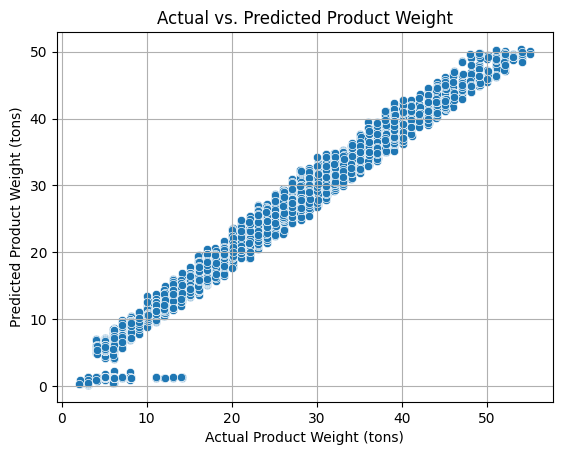

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Product Weight (tons)")
plt.ylabel("Predicted Product Weight (tons)")
plt.title("Actual vs. Predicted Product Weight")
plt.grid(True)
plt.show()

####Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
#Fit the model
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train,y_train)

Ridge()

In [ ]:
#Predict model
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
#Evaluating the model
mse = mean_squared_error(y_test,y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_ridge)
r2 = r2_score(y_test,y_pred_ridge)
mape = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

print(f'Mean Squared Errord (MSE): {mse:.2f}')
print('--'*20)
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print('--'*20)
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print('--'*20)
print(f'R-squared (R2): {r2: .2f}')
print('--'*20)
print(f'Mean Absolute Percentage Error: {mape: .2f}%')

Mean Squared Errord (MSE): 3.09
----------------------------------------
Root Mean Squared Error (RMSE):  1.76
----------------------------------------
Mean Absolute Error (MAE):  1.30
----------------------------------------
R-squared (R2):  0.98
----------------------------------------
Mean Absolute Percentage Error:  9.07%


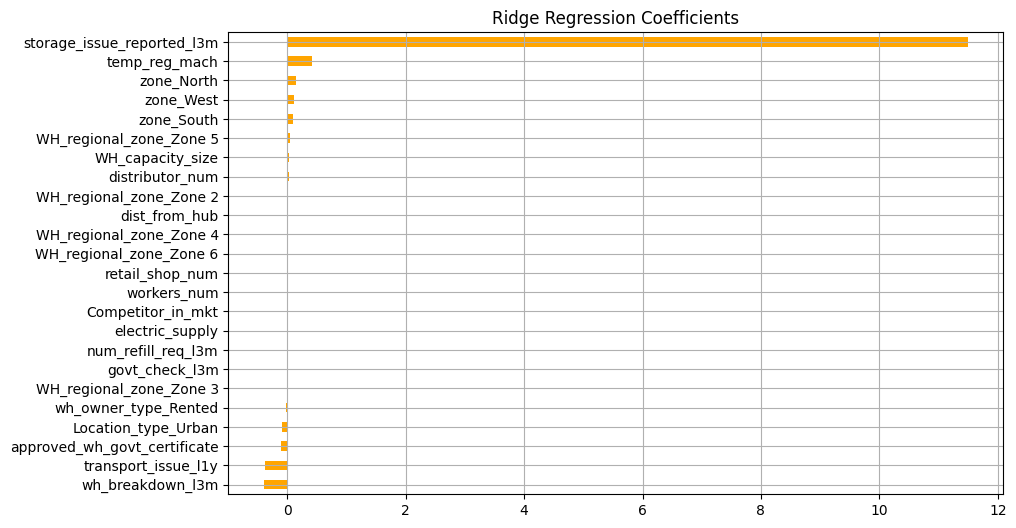

In [ ]:
ridge_coef = pd.Series(ridge_model.coef_, index=X_train.columns)
ridge_coef.sort_values().plot(kind='barh', figsize=(10,6), color='orange')
plt.title("Ridge Regression Coefficients")
plt.grid(True)
plt.show()

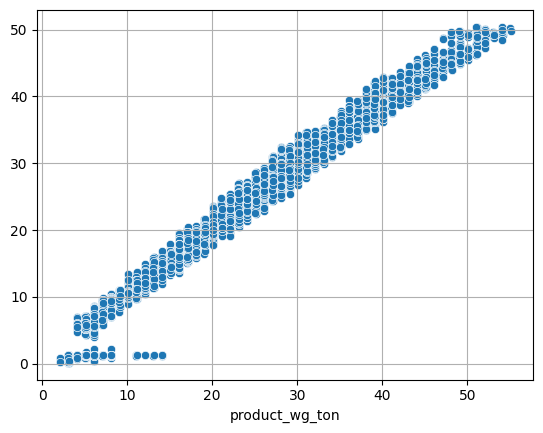

In [ ]:
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.grid(True)


In [ ]:

print("Train R²:", ridge_model.score(X_train, y_train))
print("Test R²:", ridge_model.score(X_test, y_test))


Train R²: 0.9773667175437403
Test R²: 0.9768773784577964


#### Lasso Regression

In [ ]:
#importing and fit model
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 1.0, random_state = 42)
lasso_model.fit(X_train,y_train)

Lasso(random_state=42)

In [ ]:
#predict model
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
#Evaluting
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_lasso)
r2 = r2_score(y_test,y_pred_lasso)
mape = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse: .2f}')
print('--'* 20)
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print('--'*20)
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print('--'*20)
print(f'R-Squared (R2): {r2: .2f}')
print('--'*20)
print(f'Mean Absolute Percentage Error (MAPE): {mape: .2f}%')

Mean Squared Error (MSE):  4.58
----------------------------------------
Root Mean Squared Error (RMSE):  2.14
----------------------------------------
Mean Absolute Error (MAE):  1.66
----------------------------------------
R-Squared (R2):  0.97
----------------------------------------
Mean Absolute Percentage Error (MAPE):  11.35%


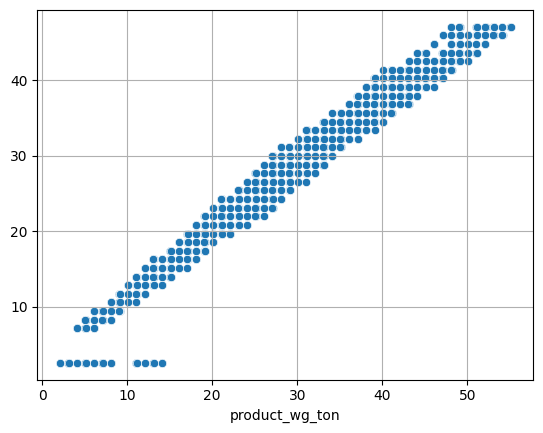

In [ ]:
sns.scatterplot(x = y_test, y = y_pred_lasso)
plt.grid(True)

#### SVR (Support Vector Regression)

In [ ]:
#fitting model
svm_model = SVR(kernel = 'rbf', C=100, epsilon = 0.1)
svm_model.fit(X_train,y_train)

SVR(C=100)

In [ ]:
y_pred_svr = svm_model.predict(X_test)

In [ ]:
#Evaluating
mse = mean_squared_error(y_test,y_pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_svr)
r2 = r2_score(y_test,y_pred_svr)
mape = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100

print(f'Mean Sqared Error (MSE): {mse: .2f}')
print('--'*20)
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print('--'*20)
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print('--'*20)
print(f'R-squared (R2): {r2: .2f}')
print('--'*20)
print(f'Mena Absolute Percentage Error (MAPE): {mape: .2f}%')

Mean Sqared Error (MSE):  1.48
----------------------------------------
Root Mean Squared Error (RMSE):  1.22
----------------------------------------
Mean Absolute Error (MAE):  0.93
----------------------------------------
R-squared (R2):  0.99
----------------------------------------
Mena Absolute Percentage Error (MAPE):  6.13%


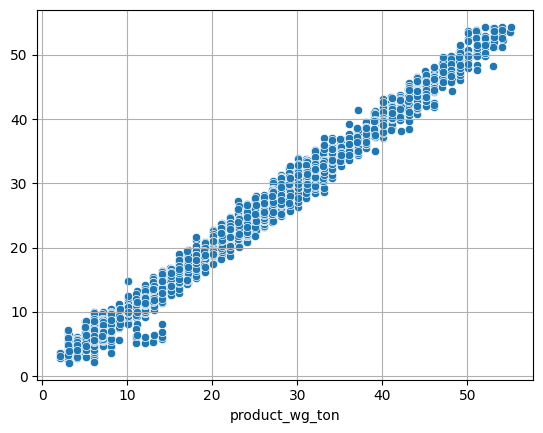

In [ ]:
sns.scatterplot(x = y_test, y = y_pred_svr)
plt.grid(True)

#### Random Forest Regressor

In [ ]:
#fitting model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train,y_train)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
#Evaluating
mse = mean_squared_error(y_test,y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred_rf)
r2 = r2_score(y_test,y_pred_rf)
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print(f'Mean Squared Error (MSE): {mse: .2f}')
print('--'*20)
print(f'Root Mean Squared Error (RMSE): {rmse: .2f}')
print('--'*20)
print(f'Mean Absolute Error (MAE): {mae: .2f}')
print('--'*20)
print(f'R-squared (R2): {r2: .2f}')
print('--'*20)
print(f'Mean Absolute Percentage Error (MAPE): {mape: .2f}%') +

SyntaxError: invalid syntax (ipython-input-2863976036.py, line 16)

In [ ]:
sns.scatterplot(x = y_test, y = y_pred_rf)
plt.grid(True)

In [ ]:
print("Model Comparison:")
models = {
    "Linear Regression": y_pred,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "SVR": y_pred_svr,
    "Random Forest": y_pred_rf
}
results = []
for name, y_pred_model in models.items():
    mse = mean_squared_error(y_test, y_pred_model)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_model)
    r2 = r2_score(y_test, y_pred_model)
    mape = np.mean(np.abs((y_test - y_pred_model) / y_test)) * 100

    results.append([name, mse, rmse, mae, r2, mape])

results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "MAE", "R²", "MAPE (%)"])
print(results_df.to_string(index=False))

### Hyperparameter Tuning

Random Forest

In [ ]:
grid_params = {
    'max_depth' : [2,5,10,20],
    'min_samples_leaf' : [5,10,20,50],
    'max_features' : ['sqrt', 'log2'],
    'n_estimators' : [10,25,50,100,200]
}

grid_search = GridSearchCV(
    estimator = RandomForestRegressor(),
    param_grid = grid_params,
    cv = 10,
    verbose = 1,
    n_jobs = -1,
    return_train_score = True
)

# Fit the model
grid_search.fit(X_train, y_train)
print('Best Score', grid_search.best_score_)
print('Best param', grid_search.best_params_)

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test R2 Score:", r2_score(y_test, y_pred))

In [ ]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score']

plt.plot(test_scores, label='Test R²')
plt.plot(train_scores, label='Train R²')
plt.title("Train vs Test Performance (GridSearchCV)")
plt.xlabel("Model Iteration")
plt.ylabel("R² Score")
plt.legend(loc='best')
plt.show()
